# Tarea Python Avanzado - Hao

## **Índice de los ejercicios**
1. [*Importar todas las librerías necesarias.*](#1)
2. [*Inicializar algunas variables que después modificaremos.*](#2)
3. [*Crear una función para generar los hostnames en base a unas reglas.*](#3)
4. [*Crear una función para obtener el nombre del SO.*](#4)
5. [*Crear una función para obtener el nombre del entorno.*](#5)
6. [*Creamos una función para obtener el nombre del país.*](#6)
7. [*Crear una función para generar el DataFrame.*](#7)
8. [*Crear el DataFrame.*](#8)
9. [*Guardar el DataFrame generado en un fichero CSV.*](#9)
10. [*Generar un único gráfico, agrupando para cada país (country) los entornos (enviroment).*](#10)
11. [*Crear una figura con 4 gráficos en una malla de 2 filas y 2 columnas.*](#11)

### 1. Importar todas las librerías necesarias. <a id=1><a />

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import random as rd

### 2. Inicializar algunas variables que después modificaremos. <a id=2><a />

In [2]:
hostnames = []
dataset = []
df = None

### 3. Crear una función para generar los hostnames en base a unas reglas. <a id=3><a />

In [3]:
def set_hostnames(number_of_hosts: int) -> None:
    """
    Número máximo de combinaciones únicas de hosts:
    4(sistema_operativo) x 5(entorno) x 6(pais) x 999(tres digitos) = 119,880
    """
    sistema_operativo = ['L']*40 + ['S']*30 + ['A']*20 + ['H']*10
    entorno = ['D']*10 + ['I']*10 + ['T']*25 + ['S']*25 + ['P']*30
    pais = ['NOR']*6 + ['FRA']*9 + ['ITA']*16 + ['ESP']*16 + ['DEU']*23 + ['IRL']*30
    grupos = []
    
    def create_hostname() -> str:
        hostname = rd.choice(sistema_operativo) + rd.choice(entorno) + rd.choice(pais)
        grupos.append(hostname)
        hostname += str(grupos.count(hostname)).zfill(3)
        return hostname
    
    for i in range(number_of_hosts):
        hostname = create_hostname()
        
        # Un hostname con un valor mayor que 999 tiene también 4 dígitos en vez de 3,
        #por lo tanto, 9 carácteres alfanuméricos : LPIRL1020
        while len(hostname) == 9:
            hostname = create_hostname()
        
        hostnames.append(hostname)

### 4. Crear una función para obtener el nombre del SO. <a id=4><a />

In [4]:
def get_os(hostname: str) -> str:
    if hostname[0] == "L":
        return "Linux"
    elif hostname[0] == "S":
        return "Solaris"
    elif hostname[0] == "A":
        return "AIX"
    elif hostname[0] == "H":
        return "HP-UX"
    else:
        return "Unknown"

### 5. Crear una función para obtener el nombre del entorno. <a id=5><a />

In [5]:
def get_environment(hostname: str) -> str:
    if hostname[1] == "D":
        return "Development"    
    elif hostname[1] == "I":
        return "Integration"
    elif hostname[1] == "T":
        return "Testing"
    elif hostname[1] == "S":
        return "Staging"
    elif hostname[1] == "P":
        return "Production"
    else:
        return "Unknown"

### 6. Creamos una función para obtener el nombre del país. <a id=6><a />

In [6]:
def get_country(hostname: str) -> str:
    if hostname[2:5] == "NOR":
        return "Norway"    
    elif hostname[2:5] == "FRA":
        return "France"
    elif hostname[2:5] == "ITA":
        return "Italy"
    elif hostname[2:5] == "ESP":
        return "Spain"
    elif hostname[2:5] == "DEU":
        return "Germany"
    elif hostname[2:5] == "IRL":
        return "Ireland"
    else:
        return "Unknown"

### 7. Crear una función para generar el DataFrame. <a id=7><a />

In [7]:
def set_dataframe(count: int) -> None:
    global df
    
    set_hostnames(count)
    
    for hostname in hostnames:
        dataset.append({
            'hostname'    : hostname,
            'os'          : get_os(hostname),
            'environment' : get_environment(hostname),
            'country'     : get_country(hostname),
            'node'        : int(hostname[-3:])
        })
    
    df = pd.DataFrame(dataset)

### 8. Crear el DataFrame. <a id=8><a />

In [8]:
set_dataframe(1500)
df

,hostname,os,environment,country,node
0,ASDEU001,AIX,Staging,Germany,1
1,LSIRL001,Linux,Staging,Ireland,1
2,LDITA001,Linux,Development,Italy,1
3,LSIRL002,Linux,Staging,Ireland,2
4,LPESP001,Linux,Production,Spain,1
...,...,...,...,...,...
1495,LTDEU040,Linux,Testing,Germany,40
1496,LTESP015,Linux,Testing,Spain,15
1497,ADDEU012,AIX,Development,Germany,12
1498,AIDEU006,AIX,Integration,Germany,6


### 9. Guardar el DataFrame generado en un fichero CSV. <a id=9><a />

In [9]:
df.to_csv("hosts.csv",
          header=True,
          index=False
          )

hosts_df = pd.read_csv("hosts.csv")
hosts_df

,hostname,os,environment,country,node
0,ASDEU001,AIX,Staging,Germany,1
1,LSIRL001,Linux,Staging,Ireland,1
2,LDITA001,Linux,Development,Italy,1
3,LSIRL002,Linux,Staging,Ireland,2
4,LPESP001,Linux,Production,Spain,1
...,...,...,...,...,...
1495,LTDEU040,Linux,Testing,Germany,40
1496,LTESP015,Linux,Testing,Spain,15
1497,ADDEU012,AIX,Development,Germany,12
1498,AIDEU006,AIX,Integration,Germany,6


### 10. Generar un único gráfico, agrupando para cada país (country) los entornos (enviroment). <a id=10><a />

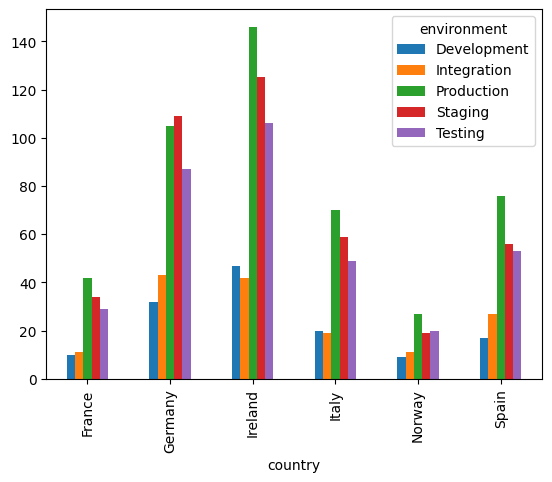

In [10]:
(hosts_df
        .groupby(by='country')
        ['environment']
        .value_counts()
        .unstack('environment')
        .plot(kind='bar')
);

### 11. Crear una figura con 4 gráficos en una malla de 2 filas y 2 columnas. <a id=11><a />

#### Preparación de df/series para la visualización

In [11]:
# Esquina superior izquierda: 
count_os_by_country = (hosts_df
                                .groupby(by='country')
                                ['os']
                                .value_counts()
                                .unstack()
                       )
count_os_by_country

os,AIX,HP-UX,Linux,Solaris
country,,,,
France,27,13,52,34
Germany,74,28,152,122
Ireland,102,52,174,138
Italy,41,26,78,72
Norway,16,11,39,20
Spain,47,22,82,78


In [12]:
# Esquina superior derecha: 
count_os = (hosts_df
                  .groupby(by='os')
                  .size()
                  .to_frame()
                  .assign(
                        fraction_pct=lambda df: df[0].transform(lambda row: row / row.sum() * 100).round(2),
                        label_text=lambda df: df.index + ' (' + df.fraction_pct.astype('str') + '%)'
                  )
            )
count_os

,0,fraction_pct,label_text
os,,,
AIX,307,20.47,AIX (20.47%)
HP-UX,152,10.13,HP-UX (10.13%)
Linux,577,38.47,Linux (38.47%)
Solaris,464,30.93,Solaris (30.93%)


In [17]:
# Esquina inferior izquierda:
count_host_by_country = (hosts_df
                                .country
                                .value_counts()
                        )
count_host_by_country

Ireland    466
Germany    376
Spain      229
Italy      217
France     126
Norway      86
Name: country, dtype: int64

In [14]:
# Esquina inferior derecha:
count_host_by_environment = (hosts_df
                                    .groupby(by=['country', 'environment'])
                                    .size()
                                    .unstack(0)
                            )
count_host_by_environment

country,France,Germany,Ireland,Italy,Norway,Spain
environment,,,,,,
Development,10,32,47,20,9,17
Integration,11,43,42,19,11,27
Production,42,105,146,70,27,76
Staging,34,109,125,59,19,56
Testing,29,87,106,49,20,53


#### Visualización

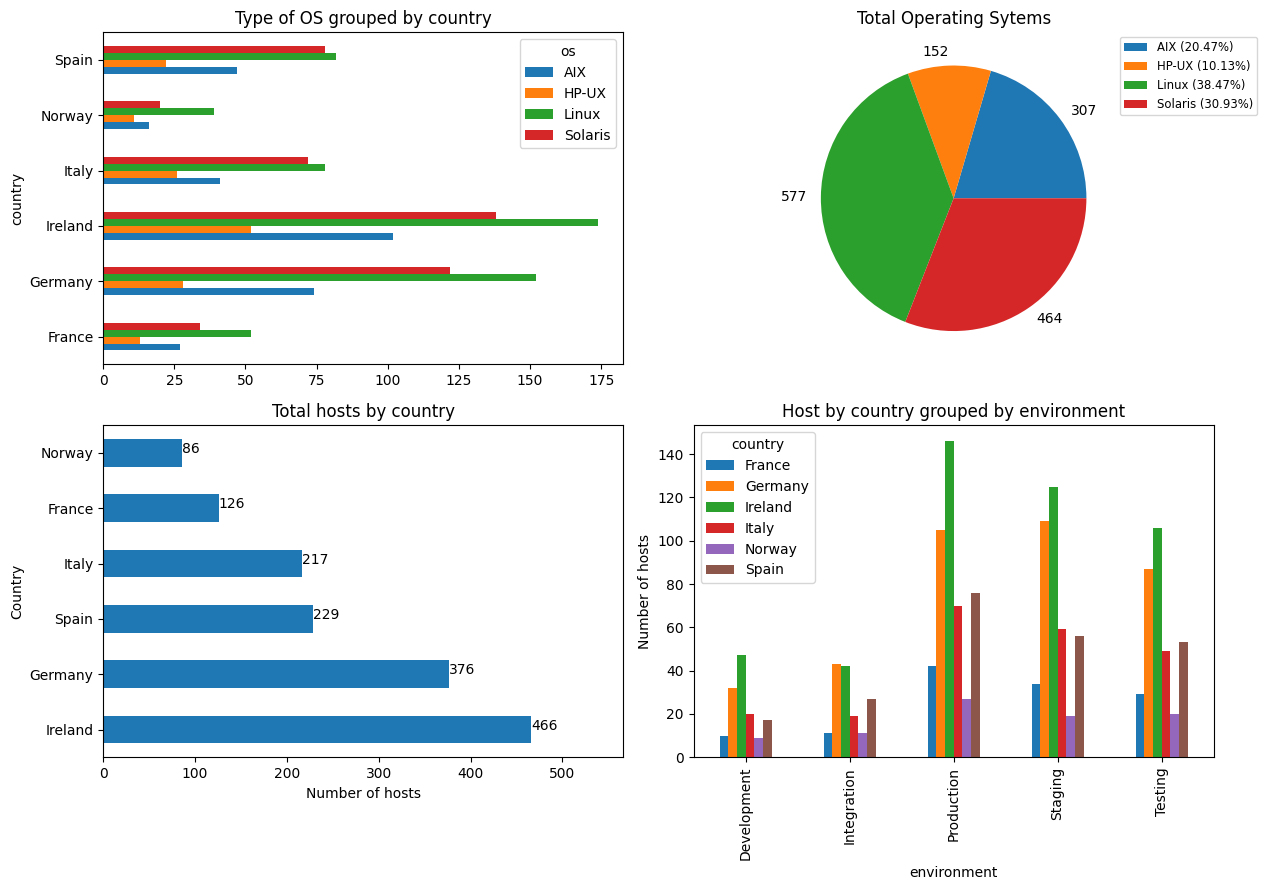

In [18]:
fig, ax = plt.subplots(2, 2, figsize=(13, 9))

# Esquina superior izquierda:
count_os_by_country.plot(kind='barh',
                         ax=ax[0,0],
                         title='Type of OS grouped by country'
                         )

# Esquina superior derecha:
ax[0,1].pie(count_os[0],
            labels=count_os[0]
            )

ax[0,1].set_title('Total Operating Sytems')
ax[0,1].legend(loc=(1,0.75), 
               labels=count_os.label_text,
               fontsize='small'
               )

# Esquina inferior izquierda:
count_host_by_country.plot(kind='barh',
                           ax=ax[1,0],
                           title='Total hosts by country',
                           xlim=(0, count_host_by_country.max() + 100)
                           )

for i, value in enumerate(count_host_by_country):
    ax[1,0].annotate(text=value,
                     xy=(value, i)
                     )

ax[1,0].set_ylabel('Country')
ax[1,0].set_xlabel('Number of hosts')

# Esquina inferior derecha:
count_host_by_environment.plot(kind='bar',
                               ax=ax[1,1],
                               title='Host by country grouped by environment'
                               )

ax[1,1].set_ylabel('Number of hosts')

plt.tight_layout()
plt.show()